# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

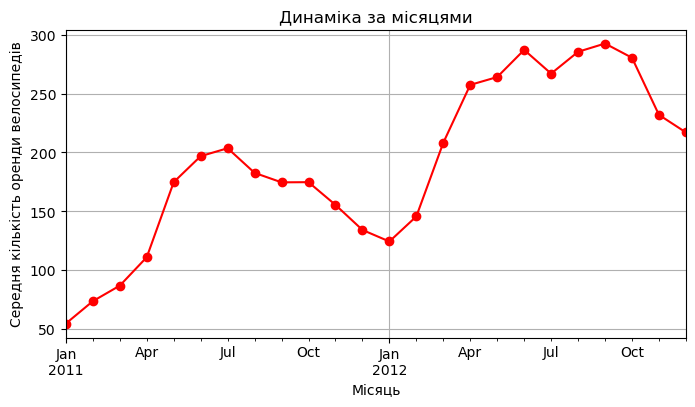

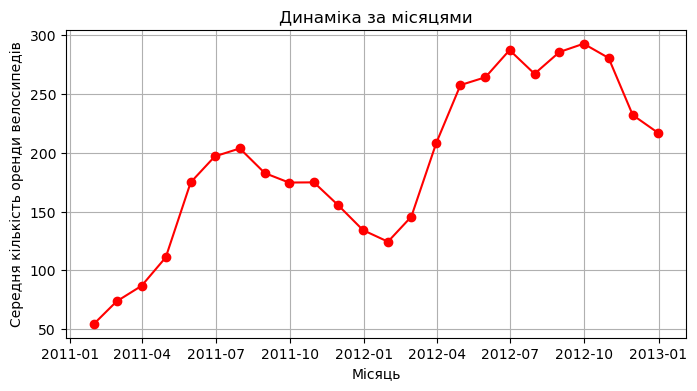

In [12]:
# Побудова лінійного графіка з використанням Pandas
monthly_mean=df['count'].resample('ME').mean()
monthly_mean.plot(
    kind='line',
    marker='o',
    color='red',
    figsize=(8, 4),
    title='Динаміка за місяцями',
    xlabel='Місяць',
    ylabel='Cередня кількість оренди велосипедів',
    grid=True
);

# Побудова лінійного графіка з використанням Matplotlib безпосередньо
plt.figure(figsize=(8, 4))
plt.plot(monthly_mean, 'r-o')
plt.title('Динаміка за місяцями')
plt.xlabel('Місяць')
plt.ylabel('Cередня кількість оренди велосипедів')
plt.grid(True)
plt.show()


In [14]:
Чим відрізняються 2 побудованих графіки? Який вам більше подобається?

Відрізняється сітка, при використанні Pandas сітка має тільки горизонтальні лінії в Matplotlib і горизонтальні
і веритикальні. Також в Matplotlib є трохи вільного простору з боків від графіка, тобто лінія не будується безпосередньо від
краю. В даному випадку мені більше подобається графік побудований в Matplotlib, але в основному через вигляд сітки.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [15]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

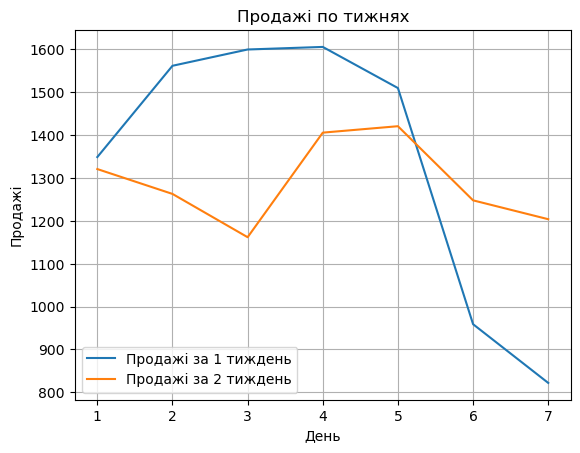

In [19]:
plt.plot(days, sales_week1 , label='Продажі за 1 тиждень')
plt.plot(days, sales_week2 , label='Продажі за 2 тиждень')
plt.title('Продажі по тижнях')
plt.xlabel('День')
plt.ylabel('Продажі')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
1. Судячи з графіку, в який тиждень проодажі були стабільніше?

Судячи з графіку найстабільнішим днем тижня по продажах був понеділок.

2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

Можна відняти від значень першого тижня значення другого і потім знайти мінімальне з модулів отриманих різниць.
Обчислення наведено в наступній комірці.

In [22]:
week1=np.array(sales_week1)
week2=np.array(sales_week2)
diff=np.abs(week1-week2)
most_stable_day=days[np.argmin(diff)]
print('Найстабільніший день тижня:', most_stable_day)

Найстабільніший день тижня: 1


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

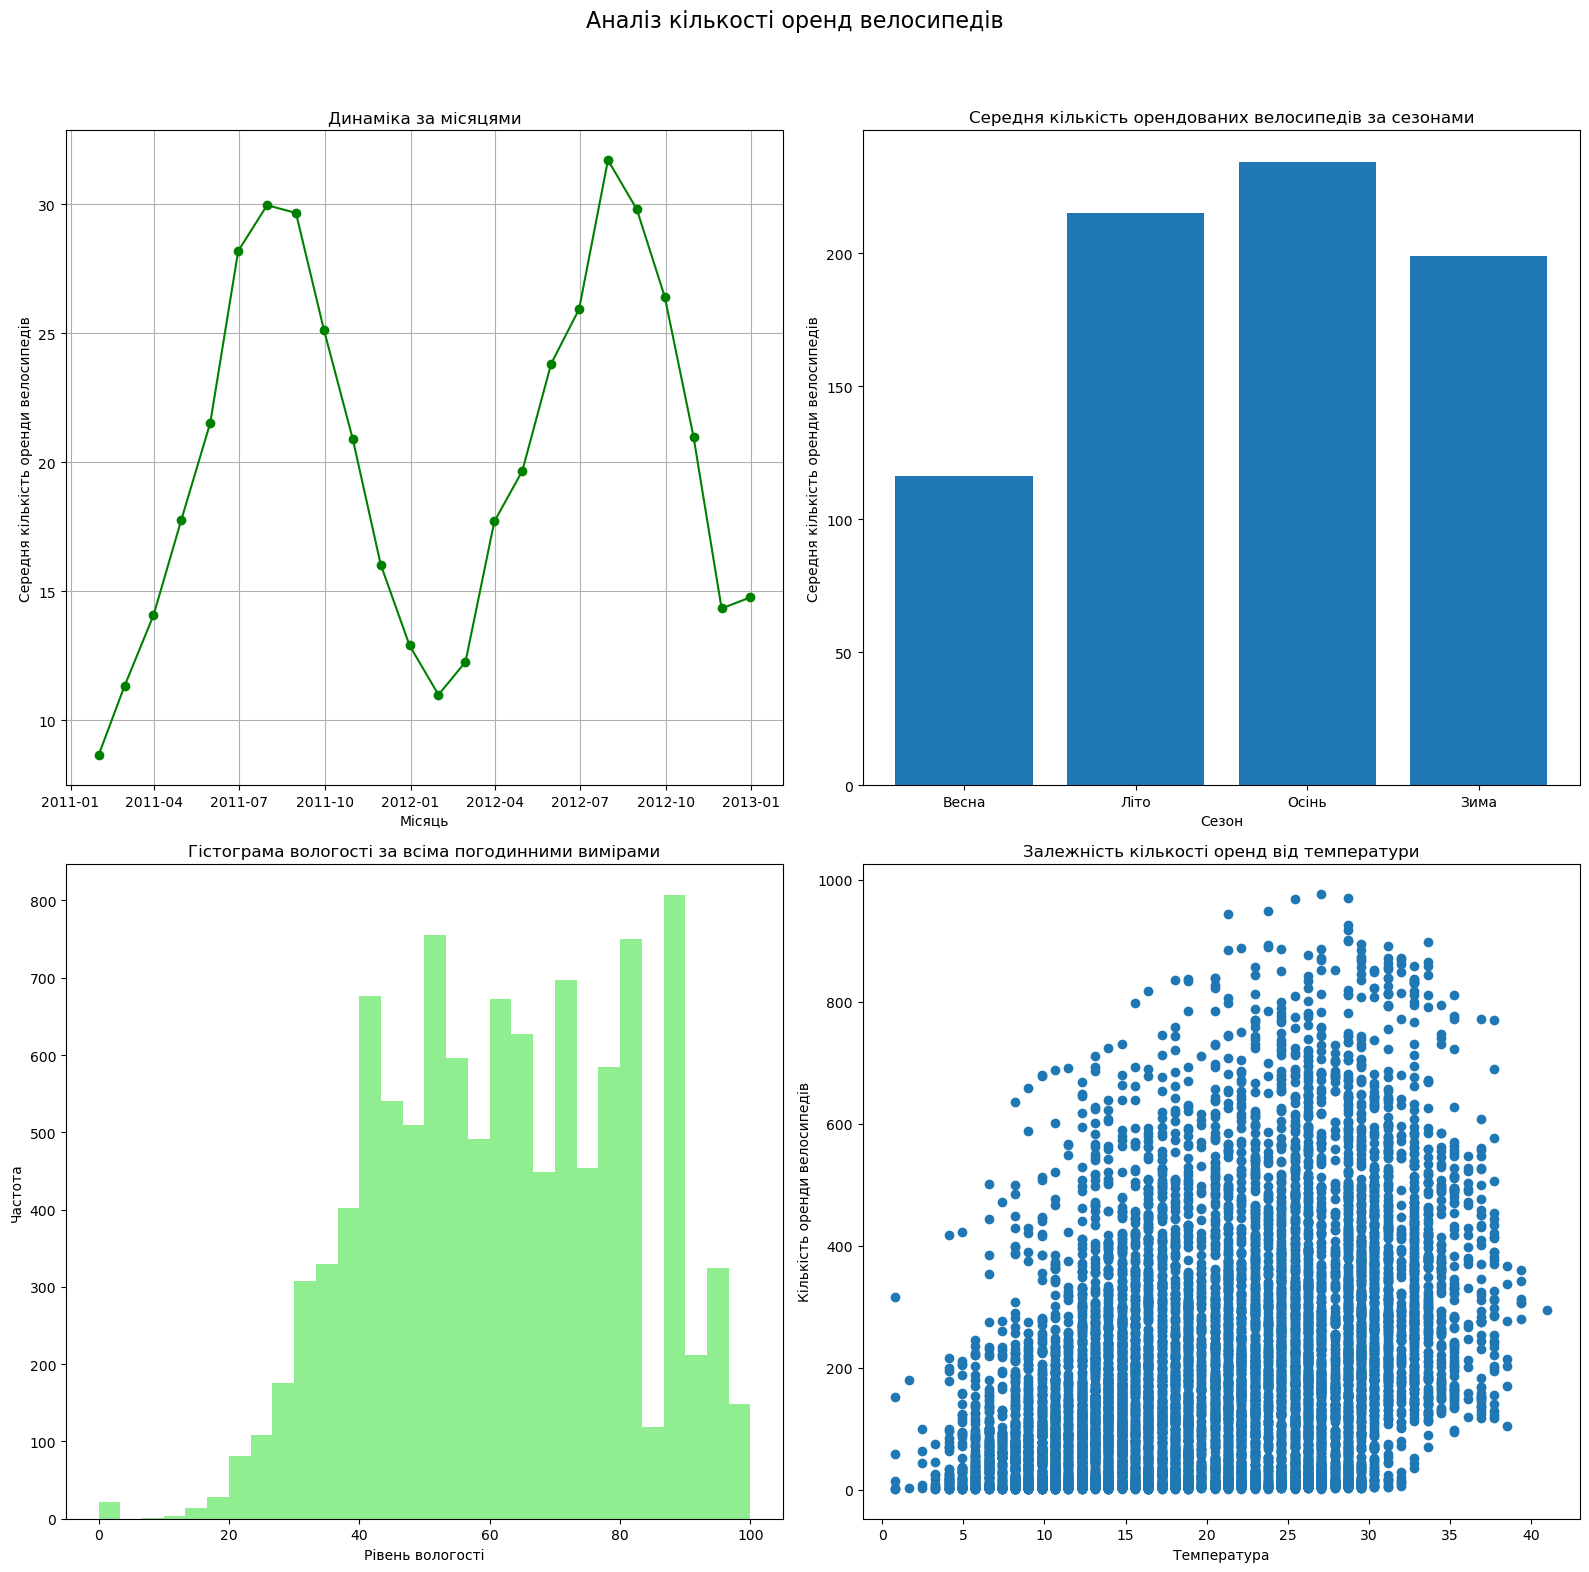

In [48]:
plt.figure(figsize=(16,16))  

# Лінійний графік середньої температури помісячно
monthly_mean_temp=df['temp'].resample('ME').mean()
plt.subplot(2, 2, 1)  
plt.plot(monthly_mean_temp, 'g-o')
plt.title('Динаміка за місяцями')
plt.xlabel('Місяць')
plt.ylabel('Cередня кількість оренди велосипедів')
plt.grid(True)

#Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
season_mean=df[['season','count']].groupby(['season']).mean()
sn=['Весна', 'Літо', 'Осінь','Зима' ]
plt.subplot(2, 2, 2) 
plt.bar(sn, season_mean['count'])
plt.title('Середня кількість орендованих велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Cередня кількість оренди велосипедів')


#Гістограма вологості за всіма погодинними вимірами.
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=30, color='lightgreen')
plt.title('Гістограма вологості за всіма погодинними вимірами')
plt.xlabel('Рівень вологості')
plt.ylabel('Частота')


#Scatter plot температури vs кількості оренд
plt.subplot(2, 2, 4) 
plt.scatter(df['temp'], df['count'])
plt.title('Залежність кількості оренд від температури')
plt.xlabel('Температура')
plt.ylabel('Кількість оренди велосипедів')



plt.suptitle('Аналіз кількості оренд велосипедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

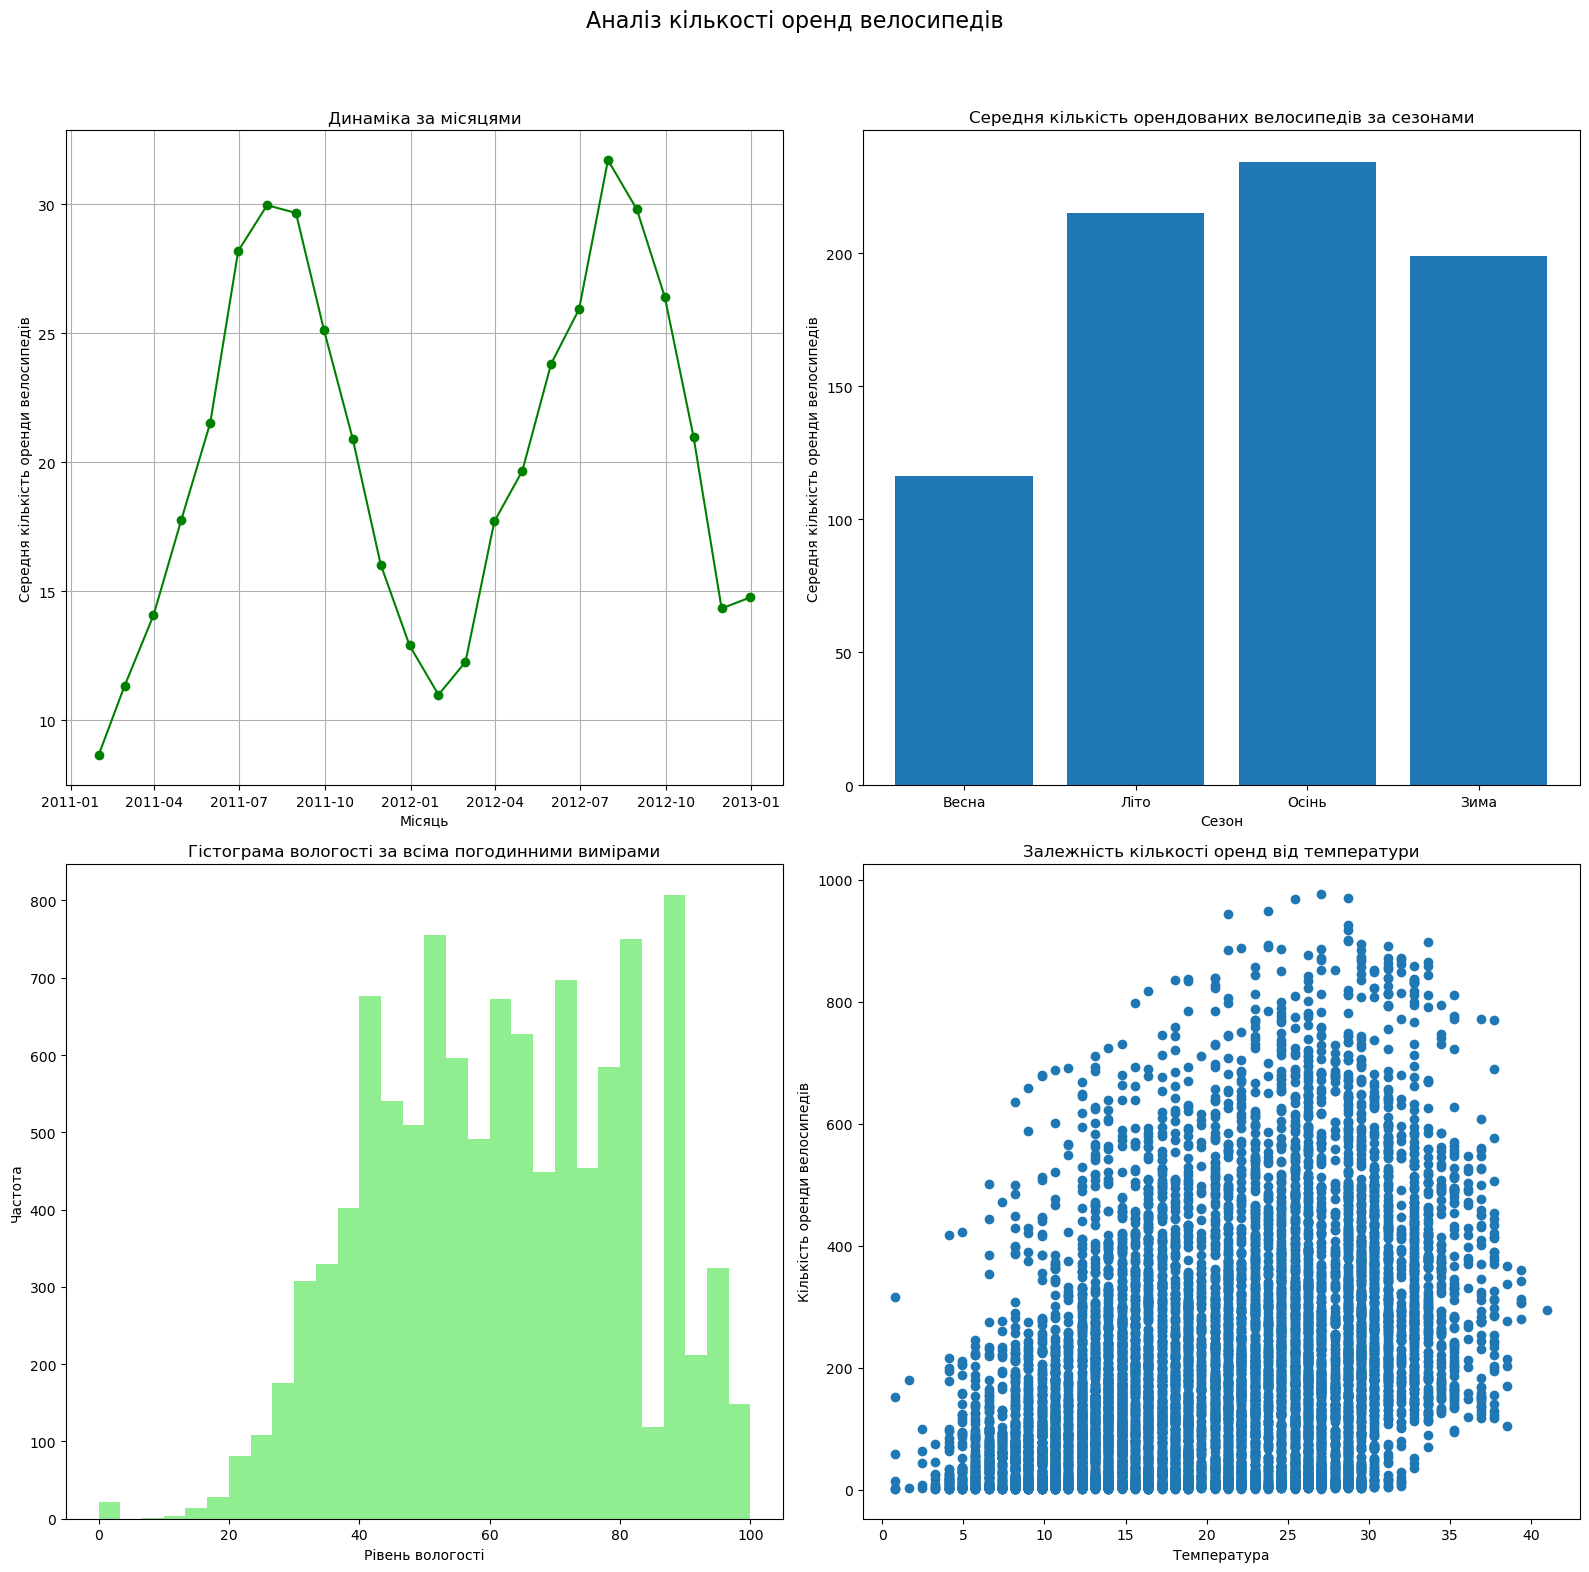

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

# Лінійний графік середньої температури помісячно
# monthly_mean_temp було визначено в попередньому завданні
ax[0, 0].plot(monthly_mean_temp, 'g-o')
ax[0, 0].set_title('Динаміка за місяцями')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Cередня кількість оренди велосипедів')
ax[0, 0].grid(True)

#Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
# season_mean та sn було визначено в попередньому завданні
ax[0, 1].bar(sn, season_mean['count'])
ax[0, 1].set_title('Середня кількість орендованих велосипедів за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Cередня кількість оренди велосипедів')


#Гістограма вологості за всіма погодинними вимірами.
ax[1, 0].hist(df['humidity'], bins=30, color='lightgreen')
ax[1, 0].set_title('Гістограма вологості за всіма погодинними вимірами')
ax[1, 0].set_xlabel('Рівень вологості')
ax[1, 0].set_ylabel('Частота')


#Scatter plot температури vs кількості оренд
ax[1, 1].scatter(df['temp'], df['count'])
ax[1, 1].set_title('Залежність кількості оренд від температури')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренди велосипедів')


fig.suptitle('Аналіз кількості оренд велосипедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
Чим відрізняється підхід побудови кількох графіків на одній фігурі з plt.subplots() від plt.subplot()?

В plt.subplots() ми маємо прямий доступ до графіку за індексом. Коли маємо багато графіків цей підхід набагато зручніше. Можна легше змінювати щось в графіках 
і не губитис але цей підхід потребує трохи більше коду. plt.subplot() зручно використовувати при невеликій кількості графік, до 4х.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [53]:
import matplotlib.dates as mdates

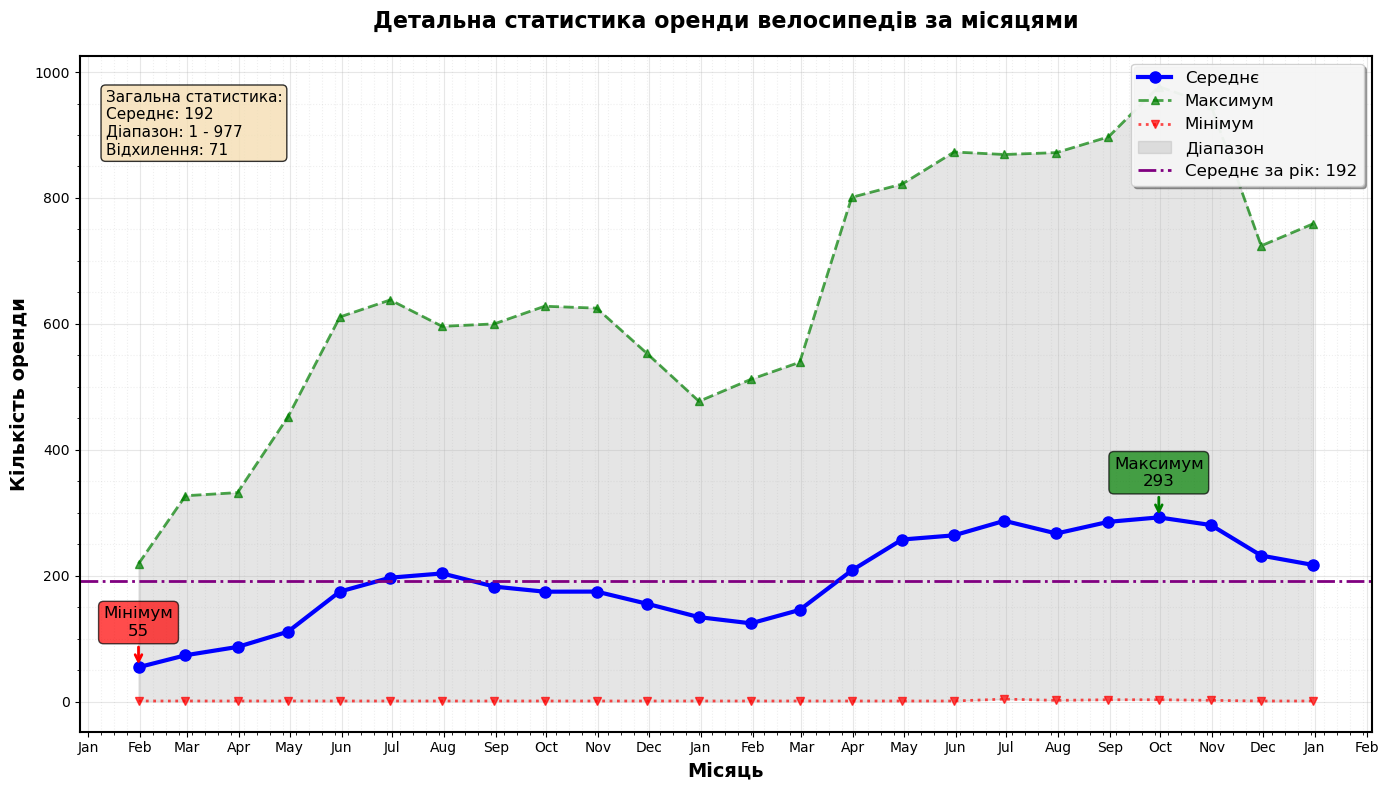

In [69]:
fig, ax = plt.subplots(figsize=(14, 8))

# Малюємо лінії з різними стилями
# monthly_mean=df['count'].resample('ME').mean()
monthly_min=df['count'].resample('ME').min()
monthly_max=df['count'].resample('ME').max()
ax.plot(monthly_mean, 'b-o', linewidth=3,
        label='Середнє', markersize=8)
ax.plot(monthly_max, 'g--^', linewidth=2,
        label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_min, 'r:v', linewidth=2,
        label='Мінімум', markersize=6, alpha=0.7)

# Заливка між max та min (правильний синтаксис)
ax.fill_between(monthly_min.index,monthly_min , monthly_max,
                alpha=0.2, color='gray', label='Діапазон')

# Додаємо анотації для екстремальних значень
max_idx =  monthly_mean.idxmax()
max_val =  monthly_mean.max()
ax.annotate(f'Максимум\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.7))

min_idx =  monthly_mean.idxmin()
min_val =  monthly_mean.min()
ax.annotate(f'Мінімум\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val + 50),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.7))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренди', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренди велосипедів за місяцями',
             fontsize=16, fontweight='bold', pad=20)

 # Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Додаємо сітку з різними стилями
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Додаємо середню лінію за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')


# Покращуємо легенду
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Додаємо текст з додатковою статистикою
textstr = 'Загальна статистика:\n'
textstr += f'Середнє: {df["count"].mean():.0f}\n'
textstr += f'Діапазон: {df["count"].min():.0f} - {df["count"].max():.0f}\n'
textstr += f'Відхилення: {monthly_mean.std():.0f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


In [ ]:
1. Яка перевага додавання анотацій на графік?

Анотації одразу підказують, що важливого сталося в конкретній точці графіка:піки, падінняї тощо. 
Анотації додають контекст до сухих чисел. Одразу стає легше розуміти, що показано на графіку.

2. Для чого використовується fill_between()?

Для того, щоб показати діапазон значень мінімум-максимум, довірчий інтервал.

3. Як текстовий блок допомагає в інтерпретації даних?

Графік без пояснень це просто набір ліній. Текстовий блок розказує,що саме відображено, чому це важливо і т.д.